In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/yousuf/Downloads/indian-liver-patient-records/indian_liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [5]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
df.Gender=df['Gender'].map({'Female':0,'Male':1})

In [9]:
df.Dataset=df['Dataset'].map({1:0,2:1})

In [10]:
df.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [11]:
df.Gender.value_counts().plot(kind='bar')

In [12]:
df.loc[(df.Age>40)&(df.Dataset==1),'Dataset'].sum()

83

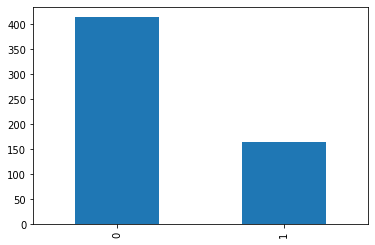

In [13]:
df.Dataset.value_counts().plot(kind='bar')

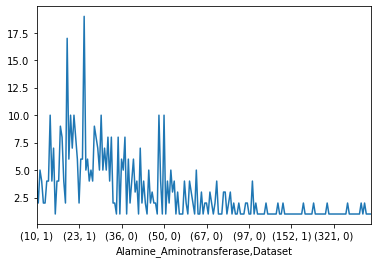

In [14]:
df.groupby(df.Alamine_Aminotransferase)['Dataset'].value_counts().plot()

In [15]:
X=df.drop('Dataset',axis=1)

In [16]:
y=df.iloc[:,-1]

In [17]:
from keras.utils import normalize,to_categorical

Using TensorFlow backend.


In [18]:
X=normalize(X)

In [19]:
y=to_categorical(y)

In [20]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
 X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.9,stratify=y)

In [24]:
X_train.shape

(521, 10)

In [35]:
model= Sequential()

In [36]:
model.add(Dense(10,activation='relu',input_shape=(10,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 120)               1320      
_________________________________________________________________
dense_11 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 242       
Total params: 16,192
Trainable params: 16,192
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
521/521 [==============================] - 0s 220us/step - loss: 0.6142 - accuracy: 0.7159
Epoch 2/500
521/521 [==============================] - 0s 35us/step - loss: 0.5985 - accuracy: 0.7159
Epoch 3/500
521/521 [==============================] - 0s 36us/step - loss: 0.5979 - accuracy: 0.7159
Epoch 4/500
521/521 [==============================] - 0s 32us/step - loss: 0.5904 - accuracy: 0.7159
Epoch 5/500
521/521 [==============================] - 0s 36us/step - loss: 0.5869 - accuracy: 0.7159
Epoch 6/500
521/521 [==============================] - 0s 40us/step - loss: 0.5791 - accuracy: 0.7159
Epoch 7/500
521/521 [==============================] - 0s 35us/step - loss: 0.5741 - accuracy: 0.7159
Epoch 8/500
521/521 [==============================] - 0s 31us/step - loss: 0.5680 - accuracy: 0.7159
Epoch 9/500
521/521 [==============================] - 0s 35us/step - loss: 0.5687 - accuracy: 0.7159
Epoch 10/500
521/521 [==============================] - 0s 38us/step - loss: 0.56

521/521 [==============================] - 0s 33us/step - loss: 0.5163 - accuracy: 0.7044
Epoch 81/500
521/521 [==============================] - 0s 31us/step - loss: 0.5127 - accuracy: 0.7351
Epoch 82/500
521/521 [==============================] - 0s 35us/step - loss: 0.5092 - accuracy: 0.7140
Epoch 83/500
521/521 [==============================] - 0s 33us/step - loss: 0.5018 - accuracy: 0.7332
Epoch 84/500
521/521 [==============================] - 0s 31us/step - loss: 0.5012 - accuracy: 0.7332
Epoch 85/500
521/521 [==============================] - 0s 33us/step - loss: 0.5039 - accuracy: 0.7179
Epoch 86/500
521/521 [==============================] - 0s 31us/step - loss: 0.5132 - accuracy: 0.7198
Epoch 87/500
521/521 [==============================] - 0s 31us/step - loss: 0.5091 - accuracy: 0.7121
Epoch 88/500
521/521 [==============================] - 0s 31us/step - loss: 0.5077 - accuracy: 0.7390
Epoch 89/500
521/521 [==============================] - 0s 31us/step - loss: 0.5042 - 

521/521 [==============================] - 0s 35us/step - loss: 0.4837 - accuracy: 0.7486
Epoch 160/500
521/521 [==============================] - 0s 36us/step - loss: 0.4850 - accuracy: 0.7313
Epoch 161/500
521/521 [==============================] - 0s 35us/step - loss: 0.4833 - accuracy: 0.7466
Epoch 162/500
521/521 [==============================] - 0s 33us/step - loss: 0.4844 - accuracy: 0.7486
Epoch 163/500
521/521 [==============================] - 0s 35us/step - loss: 0.4888 - accuracy: 0.7255
Epoch 164/500
521/521 [==============================] - 0s 35us/step - loss: 0.4971 - accuracy: 0.7198
Epoch 165/500
521/521 [==============================] - 0s 33us/step - loss: 0.4965 - accuracy: 0.7255
Epoch 166/500
521/521 [==============================] - 0s 33us/step - loss: 0.4862 - accuracy: 0.7409
Epoch 167/500
521/521 [==============================] - 0s 31us/step - loss: 0.4857 - accuracy: 0.7332
Epoch 168/500
521/521 [==============================] - 0s 31us/step - loss: 

521/521 [==============================] - 0s 33us/step - loss: 0.4728 - accuracy: 0.7428
Epoch 238/500
521/521 [==============================] - 0s 38us/step - loss: 0.4750 - accuracy: 0.7524
Epoch 239/500
521/521 [==============================] - 0s 35us/step - loss: 0.4675 - accuracy: 0.7466
Epoch 240/500
521/521 [==============================] - 0s 35us/step - loss: 0.4761 - accuracy: 0.7370
Epoch 241/500
521/521 [==============================] - 0s 36us/step - loss: 0.4693 - accuracy: 0.7524
Epoch 242/500
521/521 [==============================] - 0s 29us/step - loss: 0.4681 - accuracy: 0.7370
Epoch 243/500
521/521 [==============================] - 0s 33us/step - loss: 0.4729 - accuracy: 0.7313
Epoch 244/500
521/521 [==============================] - 0s 31us/step - loss: 0.4682 - accuracy: 0.7447
Epoch 245/500
521/521 [==============================] - 0s 31us/step - loss: 0.4673 - accuracy: 0.7409
Epoch 246/500
521/521 [==============================] - 0s 31us/step - loss: 

521/521 [==============================] - 0s 35us/step - loss: 0.4577 - accuracy: 0.7620
Epoch 316/500
521/521 [==============================] - 0s 31us/step - loss: 0.4568 - accuracy: 0.7678
Epoch 317/500
521/521 [==============================] - 0s 33us/step - loss: 0.4562 - accuracy: 0.7466
Epoch 318/500
521/521 [==============================] - 0s 33us/step - loss: 0.4642 - accuracy: 0.7428
Epoch 319/500
521/521 [==============================] - 0s 33us/step - loss: 0.4668 - accuracy: 0.7486
Epoch 320/500
521/521 [==============================] - 0s 35us/step - loss: 0.4691 - accuracy: 0.7447
Epoch 321/500
521/521 [==============================] - 0s 35us/step - loss: 0.4531 - accuracy: 0.7697
Epoch 322/500
521/521 [==============================] - 0s 33us/step - loss: 0.4569 - accuracy: 0.7524
Epoch 323/500
521/521 [==============================] - 0s 36us/step - loss: 0.4522 - accuracy: 0.7582
Epoch 324/500
521/521 [==============================] - 0s 35us/step - loss: 

521/521 [==============================] - 0s 33us/step - loss: 0.4374 - accuracy: 0.7812
Epoch 394/500
521/521 [==============================] - 0s 31us/step - loss: 0.4343 - accuracy: 0.7678
Epoch 395/500
521/521 [==============================] - 0s 33us/step - loss: 0.4434 - accuracy: 0.7601
Epoch 396/500
521/521 [==============================] - 0s 31us/step - loss: 0.4474 - accuracy: 0.7562
Epoch 397/500
521/521 [==============================] - 0s 35us/step - loss: 0.4352 - accuracy: 0.7716
Epoch 398/500
521/521 [==============================] - 0s 33us/step - loss: 0.4416 - accuracy: 0.7639
Epoch 399/500
521/521 [==============================] - 0s 31us/step - loss: 0.4413 - accuracy: 0.7639
Epoch 400/500
521/521 [==============================] - 0s 31us/step - loss: 0.4466 - accuracy: 0.7466
Epoch 401/500
521/521 [==============================] - 0s 31us/step - loss: 0.4575 - accuracy: 0.7409
Epoch 402/500
521/521 [==============================] - 0s 31us/step - loss: 

521/521 [==============================] - 0s 33us/step - loss: 0.4159 - accuracy: 0.7850
Epoch 472/500
521/521 [==============================] - 0s 33us/step - loss: 0.4167 - accuracy: 0.7985
Epoch 473/500
521/521 [==============================] - 0s 38us/step - loss: 0.4126 - accuracy: 0.7850
Epoch 474/500
521/521 [==============================] - 0s 31us/step - loss: 0.4191 - accuracy: 0.7946
Epoch 475/500
521/521 [==============================] - 0s 40us/step - loss: 0.4246 - accuracy: 0.7735
Epoch 476/500
521/521 [==============================] - 0s 35us/step - loss: 0.4136 - accuracy: 0.7908
Epoch 477/500
521/521 [==============================] - 0s 35us/step - loss: 0.4143 - accuracy: 0.8081
Epoch 478/500
521/521 [==============================] - 0s 33us/step - loss: 0.4173 - accuracy: 0.7812
Epoch 479/500
521/521 [==============================] - 0s 31us/step - loss: 0.4129 - accuracy: 0.7754
Epoch 480/500
521/521 [==============================] - 0s 29us/step - loss: 

In [40]:
metrics=pd.DataFrame(model.history.history)

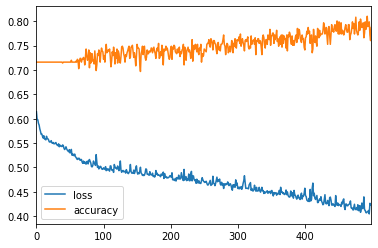

In [41]:
metrics.plot()

In [42]:
score=model.evaluate(X_test,y_test)

58/58 [==============================] - 0s 345us/step


In [43]:
print('score',score)

score [0.5216329303281061, 0.7586206793785095]


In [44]:
y_pred=model.predict_classes(X_test)

In [45]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [47]:
y=df.iloc[:,-1]

In [48]:
 X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.9,stratify=y)

In [62]:
test=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [76]:
test['Actual'].value_counts()

0    41
1    17
Name: Actual, dtype: int64

In [78]:
test['Predicted'].value_counts()

0    35
1    23
Name: Predicted, dtype: int64